Tên thành viên: 
1. Vũ Công Duy - 19120212
2. Tô Gia Thuận - 19120389

# Import thư viện

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import copy
import seaborn as sns

# Thu thập dữ liệu

Dữ liệu được sử dụng trong đồ án này là tập dữ liệu được thu thập sẵn và được đăng tải trên Kaggle. Đây là tập dữ liệu thông tin về các khoản vay bao gồm thông tin cá nhân của người vay và khoản vay có được chấp nhận hay không.
Dữ liệu bao gồm :  
- File `df1_loan.csv` : tập dữ liệu 

Nguồn dữ liệu: [Loan Application Data](https://www.kaggle.com/vipin20/loan-application-data?fbclid=IwAR1fjcdLGjY-5E5rgJMjQwrH2PGrnum4G3dyXH2ZnEIE8rg1RXMu-7hA95Q)

Thông tin mô tả dữ liệu được trích dẫn một phần từ nguồn trên:
>About data set
Among all industries, Banking domain has the largest use of analytics & data science methods. This data set would provide you enough taste of working on data sets from insurance companies and banks, what challenges are faced, what strategies are used, etc. This is a classification problem. The data has 615 rows and 14 features to predict weather loan approved or not approved.

>Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.



# Khám phá dữ liệu (trong quá trình khám phá, có thể sẽ dừng lại để tiền xử lý)

## Đọc dữ liệu từ file vào dataframe

In [2]:
loan_df = pd.read_csv('Data/df1_loan.csv', delimiter=',', index_col=0)
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,$5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,$6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,$3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,$4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,$6000.0


## Dữ liệu bao gồm bao nhiêu dòng và bao nhiêu cột?

In [3]:
loan_df.shape

(500, 14)

## Quan sát sơ lược về dữ liệu

In [4]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            500 non-null    object 
 1   Gender             491 non-null    object 
 2   Married            497 non-null    object 
 3   Dependents         488 non-null    object 
 4   Education          500 non-null    object 
 5   Self_Employed      473 non-null    object 
 6   ApplicantIncome    500 non-null    int64  
 7   CoapplicantIncome  500 non-null    float64
 8   LoanAmount         482 non-null    float64
 9   Loan_Amount_Term   486 non-null    float64
 10  Credit_History     459 non-null    float64
 11  Property_Area      500 non-null    object 
 12  Loan_Status        500 non-null    object 
 13  Total_Income       500 non-null    object 
dtypes: float64(4), int64(1), object(9)
memory usage: 58.6+ KB


## Mỗi dòng có ý nghĩa gì?


Mỗi dòng là thông tin về một đơn đăng ký khoản vay của một người nào đó.

## Có dòng nào bị lặp không? Nếu có thì bao nhiêu dòng bị lặp?

In [5]:
re = loan_df.duplicated()
if re.any():
    print(f"Số dòng bị lặp: {sum(re)}")
else:
    print('Không dòng nào bị lặp')

Không dòng nào bị lặp


## Mỗi cột có ý nghĩa gì?

In [6]:
with open('description.txt', 'r') as f:
    print(f.read())

Loan_ID : Unique Loan application ID
Gender : Gender of applicant male or female
Married : Married Status! Yes or no
Dependents:Dependents of applicant
Education : Education, Graduate or Not Graduate
Self_Employed : Self_Employed! Yes or No
ApplicantIncome : Applicant total Income
CoapplicantIncome : Coapplicant total Income
LoanAmount : Loan Amount apply for loan
Loan_Amount_Term : Loan Amount Term
Credit_History : Credit History
Property_Area : Property Area
Loan_Status : Loan Status, approved or not
Total_Income : Total Icome



Từ thông tin trên, ta có thể hiểu ý nghĩa của các cột như sau:

|Tên cột|Ý nghĩa|
|:---|:---|
|**Loan_ID**|Mã định danh đăng ký vay tiền (mỗi Loan_ID là duy nhất)|
|**Gender**|Giới tính của người đăng ký vay tiền|
|**Married**|Tình trạng hôn nhân của người đăng ký vay tiền|
|**Dependents**|Số người phụ thuộc vào người đăng ký vay tiền|
|**Education**|Trình độ vấn của người đăng ký vay tiền|
|**Self_Employed**|Người nộp đơn có đang làm việc tự do hay không|
|**ApplicantIncome**|Thu nhập của người nộp đơn đăng ký vay tiền|
|**CoapplicantIncome**|Thu nhập của người đồng đăng ký(người có cùng trách nhiệm với người ddăng ký)|
|**LoanAmount**|Số tiền cho vay|
|**Loan_Amount_Term**|Thời hạn cho vay tiền|
|**Credit_History**|Lịch sử tín dụng|
|**Property_Area**|Nhà ở nằm ở khu vực nào|
|**Loan_Status**|Trạng thái khoản vay (có được duyệt hay không)|
|**Total_Income**|Tổng thu nhập (bao gồm tổng thu nhập của người đăng ký và người cùng chịu trách nhiệm)|





## Kiểu dữ liệu của mỗi cột là gì? Có cột nào có kiểu dữ liệu chưa phù hợp cần tiền xử lý không?

In [7]:
loan_df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
Total_Income          object
dtype: object

**Nhận xét**: 
- Có tới 2 cột định danh là cột index và cột `Loan_ID`.  Ta sẽ lựa chọn 1 trong 2 cột làm định danh và loại bỏ cột còn lại.  Ở đây ta sẽ chọn chọn cột đầu (vì nó tốn ít bộ nhớ hơn so với cột `Loan_ID`)
- Cột `ApplicantIncome` có kiểu dữ liệu là int64, trong khi các cột numerical khác lại có kiểu dữ liệu là float64. Vậy để dễ dàng tính toán, ta chuyển cột ApplicantIncome sáng kiểu float.

- Cột `Dependents` : ta thấy ở phần head() chỉ có dữ liệu là số nhưng khi quan sát phương thức info() thì lại thấy cột này có dạng object. Ta sẽ khám phá cột này xem có vấn đề gì không.

- Cột `Loan_status` có 2 giá Y và N, cần chuẩn hóa thành Yes và No giúp cho người đọc dễ hiểu và đồng bộ kiểu giá trị với cột Married (có cùng kiểu giá trị).

## Tiền xử lý

**Lưu ý**: Trong phần phía dưới sẽ có một số chỗ sử dụng kỹ thuật **try** và **except**, bởi vì có một số thao tác loại bỏ cột hoặc thay đổi giá trị của dòng. Nếu đã thỏa rồi sẽ không phải thực hiện nữa, vì thực hiện lại sẽ bị lỗi.

### Cột `Loan_ID`

In [8]:
try:
    loan_df = loan_df.drop(columns=['Loan_ID'])
except:
    pass

### Cột `ApplicantIncome`

In [9]:
try:
    loan_df['ApplicantIncome'] = loan_df['ApplicantIncome'].astype('float')
except:
    pass

### Cột `Dependents`

Ta sẽ tiến hành khám phá các giá trị có trong cột `Dependents`

In [10]:
loan_df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

Ta phát hiện ra có giá trị `3+`, đây là lý do khiến cho cột này có dạng `object`. Ta sẽ quy ước đổi `3+` thành `3` để đồng bộ.

In [11]:
try:
    loan_df.Dependents = loan_df.Dependents.str.replace("+","",regex=False).apply(pd.to_numeric)
except:
    pass

### Cột `Loan_Status`

In [12]:
pattern_convert = {'Y':'Yes',
                  'N': 'No'}
try:
    loan_df['Loan_Status'] = loan_df['Loan_Status'].apply(lambda x: pattern_convert[x])
except:
    pass

### Kiểm tra lại

In [13]:
loan_df.dtypes

Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
Total_Income          object
dtype: object

Khá ổn rồi....

### Chuyển dtype của cột Toltal_income sang dạng số

Có thể thấy cột `Total_income` thực chât là biểu diễn số liệu nhưng lại được biểu diễn dưới dạng object do có kí tự "\$" đứng trước.  
Ta sẽ tiến hành loại bỏ kí tự "\$" đứng đầu và chuyển về dạng số.  

In [14]:
try:
    loan_df.Total_Income = loan_df.Total_Income.str[1:].astype(np.float64)
except:
    pass

## Khám phá mới ! `Total_income = ApplicantIncome + CoapplicantIncome`

Theo quan sát, ta thấy được `Total_income = ApplicantIncome + CoapplicantIncome`.  
Kiểm chứng bằng code :

In [15]:
np.all(loan_df.ApplicantIncome + loan_df.CoapplicantIncome == loan_df.Total_Income)

True

Đúng như dự đoán, `Total_income = ApplicantIncome + CoapplicantIncome` :)

Tuy nhiên, em quyết định không loại bỏ cột nào cả vì có thể sau này cần dùng đến.

## Với mỗi cột dữ liệu dạng categorical, các giá trị được phân bố như thế nào?

Ta tính cần tính
- missing_ratio: tỉ lệ phần trăm các giá trị thiếu.
- nums_diff_values: số lượng giá trị khác nhau (không xét giá trị thiếu).
- diff_vals_ratio: tỉ lệ phần trăm của mỗi giá trị khác nhau ứng với mỗi cột (không xét giá trị thiếu), lưu dạng dictionary với key là tên giá trị và value là tỉ lệ phần trăm của giá trị đó.

In [16]:
def missing_ratio(s):
    return s.isna().mean()*100
def nums_diff_values(s):
    return s.dropna().nunique()
def diff_vals_ratio(s):
    s = s.dropna()
    return (s.value_counts()/len(s)*100).to_dict()

#cate_cols = loan_df.select_dtypes(exclude=['float32','float64','int32','int64'])
cate_cols = loan_df.columns[loan_df.nunique() <= 9]
cate_cols = loan_df[cate_cols]
cate_cols_info = cate_cols.agg([missing_ratio, nums_diff_values, diff_vals_ratio])
cate_cols_info

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
missing_ratio,1.8,0.6,2.4,0.0,5.4,8.2,0.0,0.0
nums_diff_values,2,2,4,2,2,2,3,2
diff_vals_ratio,"{'Male': 81.4663951120163, 'Female': 18.533604...","{'Yes': 64.7887323943662, 'No': 35.2112676056338}","{0.0: 59.01639344262295, 1.0: 16.5983606557377...","{'Graduate': 78.60000000000001, 'Not Graduate'...","{'No': 86.04651162790698, 'Yes': 13.9534883720...","{1.0: 84.31372549019608, 0.0: 15.686274509803921}","{'Semiurban': 37.6, 'Urban': 34.2, 'Rural': 28...","{'Yes': 69.0, 'No': 31.0}"


Ta tiến hành trực quan hoá để có cái nhìn tổng quát hơn về dữ liệu categories

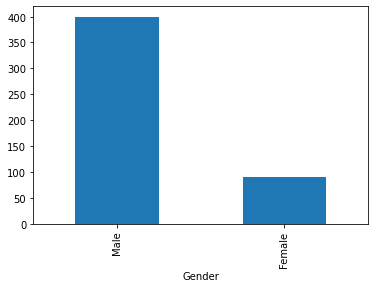

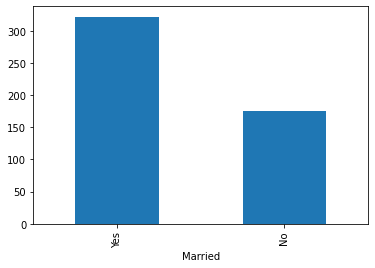

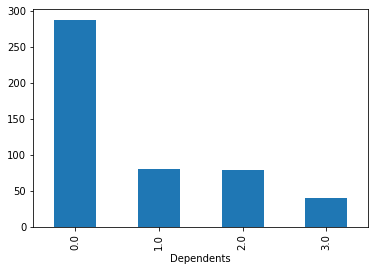

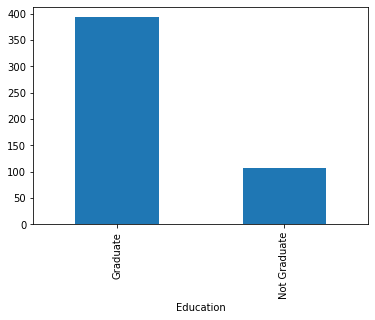

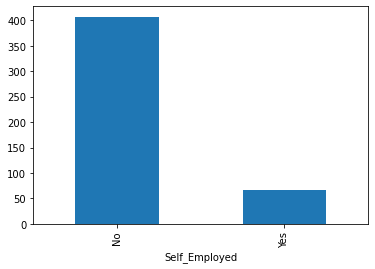

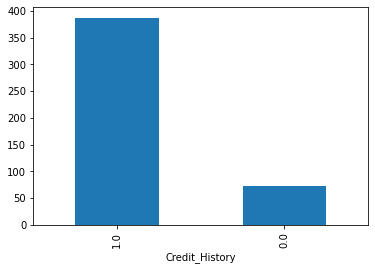

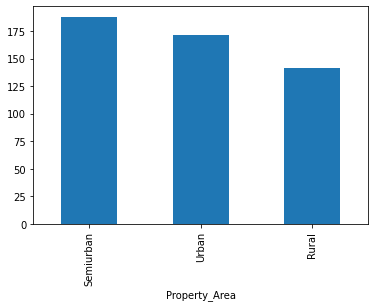

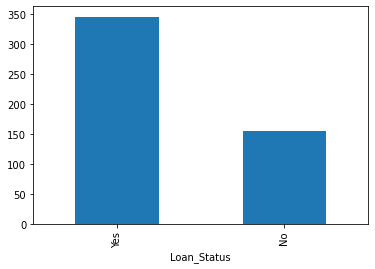

In [17]:
for col in cate_cols:
    loan_df[col].value_counts().plot.bar()
    plt.xlabel(col)
    plt.show()

Ta thấy các dữ liệu dạng categorical khá ổn và giống với mô tả về tập dữ liệu.

## Với mỗi cột dữ liệu dạng numerical, các giá trị được phân bố như thế nào?

Ta tiến hành tính các thông số missing_ratio (tỉ lệ phần trăm các giá trị thiếu), mean, min, median, max.

- Các cột `Dependents`, `Loan_Amount_Term` và `Credit_History` chỉ gồm một số giá trị cố định (quá trình thống kê sẽ không khả quan), nên ta sẽ không xét các cột đó trong quá trình thống kê. Ta tiến hành lấy các cột có nhiều hơn 10 giá trị khác nhau để xem phân bố giá trị của các cột đó.

In [18]:

nume_cols = loan_df.columns[loan_df.nunique() > 9]
nume_cols = loan_df[nume_cols]
nume_cols_info = nume_cols.agg([missing_ratio,'mean', 'std', 'min','median','max'])
nume_cols_info

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Total_Income
missing_ratio,0.000000,0.000000,3.600000,2.800000,0.000000
mean,5493.644000,1506.307840,144.020747,342.543210,6999.951840
std,6515.668972,2134.432188,82.344919,63.834977,6605.759256
min,150.000000,0.000000,17.000000,12.000000,1442.000000
median,3854.000000,1125.500000,126.500000,360.000000,5332.500000
max,81000.000000,20000.000000,700.000000,480.000000,81000.000000


Ta sẽ tiến hành trực quan hoá dữ liệu dạng numeric xem có gì bất thường không.

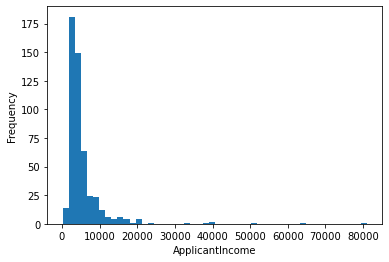

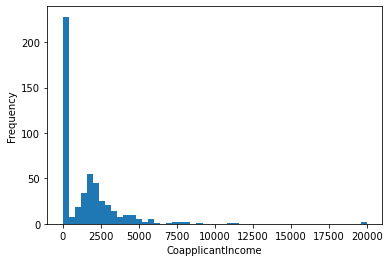

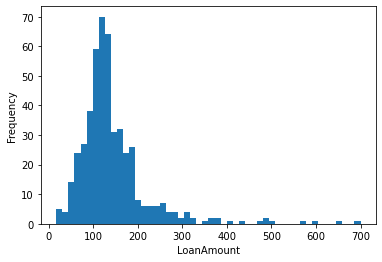

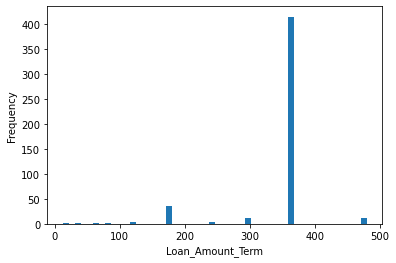

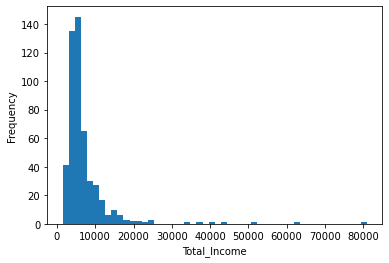

In [19]:
for col in nume_cols:
    loan_df[col].plot.hist(bins=50)
    plt.xlabel(col)
    plt.show()

Ta nhận thấy outlier của các **cột dữ liệu numerical** khá là kinh dị và sẽ rất tệ nếu ta không xử lý chúng.

## Tiếp tục tiền xử lý cho các cột numerical

### Xóa outlier như thế nào?

- Quan sát biểu đồ được trực quan hóa, ta có thể thấy giá trị của cột cột có dạng phân phối chuẩn (theo kinh nghiệm nhìn biểu đồ nhiều).
- Theo định luật Empirical : https://www.investopedia.com/terms/e/empirical-rule.asp
- 99.7% dữ liệu nằm trong khoảng [mean - 3*std , mean + 3 *std], những phần còn lại nằm ngoài khoảng này đều là linh tinh hết (outlier).

In [20]:
def notOutlierRange(s):
    _mean = s.mean()
    _std = s.std()
    return (_mean - 3 * _std , _mean + 3* _std)

Test hàm

In [21]:
notOutlierRange(loan_df.Loan_Amount_Term)

(151.03827826480864, 534.0481414882777)

### Đợi đã, việc xóa này có ảnh hưởng đến tính trực quan của dữ liệu không?

Đầu tiên, ta sẽ xem số outlier bị loại bỏ có nhiều không bằng cách tính tỉ lệ outlier có trong từng cột

In [22]:
for col in nume_cols:
    front,rear = notOutlierRange(loan_df[col])
    s = loan_df[col]
    before = len(s)
    #print(
    after = len(s.loc[(s > front) & (s < rear)])
    print(col)
    print("{}%".format(((before-after)/after)*100))

ApplicantIncome
1.4198782961460445%
CoapplicantIncome
1.4198782961460445%
LoanAmount
5.932203389830509%
Loan_Amount_Term
4.821802935010482%
Total_Income
1.4198782961460445%


Các cột trên hầu chỉ chỉ có 1.4 %, không đáng quan ngại. Nhưng cột `LoanAmount` lên tới ~6% !  
Hãy cùng xem tìm chuyện gì sẽ xảy ra nếu ta loại bỏ outlier. 

Ta tiến hành tạo bản copy của `loan_df` để xem tình hình ra sao.

In [23]:
loan_df_copy = copy.deepcopy(loan_df)
for col in nume_cols:
    front,rear = notOutlierRange(loan_df_copy[col])
    loan_df_copy = loan_df_copy.drop(loan_df_copy[~((loan_df_copy[col] > front) & (loan_df_copy[col] < rear))].index)
(1 - (loan_df_copy.shape[0]/loan_df.shape[0]))*100

15.200000000000003

Có vẻ khả quan, ta tiến hành bỏ outliers trên `loan_df`

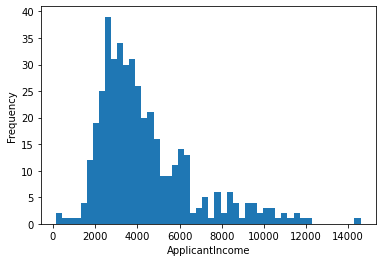

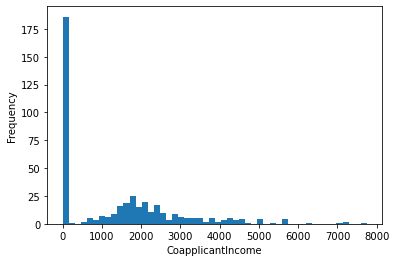

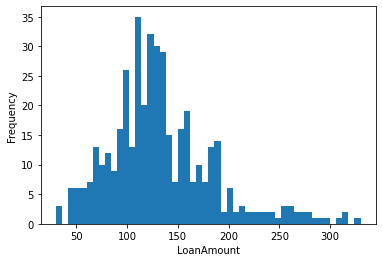

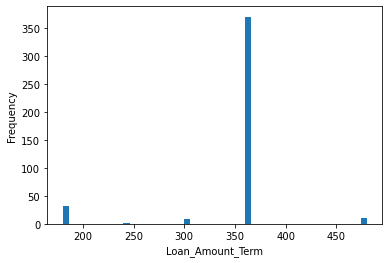

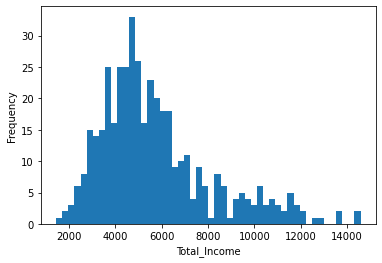

In [24]:
for col in nume_cols:
    loan_df_copy[col].plot.hist(bins=50)
    plt.xlabel(col)
    plt.show()

In [25]:
loan_df = loan_df_copy

Cập nhật lại index sau khi đã loại các dòng NaN

In [26]:
loan_df.head()
loan_df = loan_df.reset_index(drop=True)
loan_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,Male,Yes,1.0,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,No,6091.0
1,Male,Yes,0.0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Yes,3000.0
2,Male,Yes,0.0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Yes,4941.0
3,Male,No,0.0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Yes,6000.0
4,Male,Yes,2.0,Graduate,Yes,5417.0,4196.0,267.0,360.0,1.0,Urban,Yes,9613.0


# Câu hỏi 1

**Câu hỏi**: Các yếu nào ảnh hưởng đến sự quyết định phê duyệt khoản vay từ ngân hàng ?

**Trả lời được câu hỏi này** ta sẽ phần nào biết được những yếu tố tác động đến sự phê duyệt khoản từ ngân hàng. Chính vì lợi ích trên, câu hỏi sẽ giúp cho những người cần vay tiền biết được những điều kiện cần và đủ để ngân hàng phê duyệt khoản vay của họ và không phải rơi vào tình huống đăng ký vay tiền nhưng lại bị từ chối gây lãng phí thời gian và sức lực.

**Để trả lời được câu hỏi này** ta cần chọn những cột có ảnh hưởng đến quyết định phê duyệt cho vay để phân tích.
- `Loan_Status`
- `Gender`, `Married`, `Dependents`, `Education`, `Self_Employed`, `ApplicantIncome`, `CoapplicantIncome`, `LoanAmount`, `Loan_Amount_Term`, `Credit_History`, `Property_Area`, `Total_Income`

## Tiền xử lý để chuẩn bị dữ liệu cho bước phân tích trả lời câu hỏi

Đối với câu hỏi này, cột `Loan_Status` sẽ là cột trung tâm, ta sẽ phân tích các mối tương quan giữa các cột khác với cột `Loan_Status`. Do đó, cần kiểm tra lại xem cột `Loan_Status` còn tồn tại các giá trụ NaN hay không (dù ở phần trên đã có xử lý, nhưng ta xem xét lại cho chắc ăn).

In [27]:
loan_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,Male,Yes,1.0,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,No,6091.0
1,Male,Yes,0.0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Yes,3000.0
2,Male,Yes,0.0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Yes,4941.0
3,Male,No,0.0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Yes,6000.0
4,Male,Yes,2.0,Graduate,Yes,5417.0,4196.0,267.0,360.0,1.0,Urban,Yes,9613.0


In [28]:
loan_df['Loan_Status'].isnull().any()

False

Không còn giá trị thiếu, ta tiến hành chuẩn bị dữ liệu để phân tích: gom các cột thành 2 nhóm numerical và categorical. Các cột `Dependents` và `Credit_History` tuy có kiểu dữ liệu là dạng số nhưng chúng giống như các giá trị categorical hơn (vì chỉ có 2,3 giá trị phân biệt nhau) nên ta xếp chúng vào nhóm categorical.

In [29]:
cate_cols_by_status = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 
                       'Loan_Amount_Term','Credit_History','Property_Area','Loan_Status']
nume_cols_by_status = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Total_Income']

data_df = copy.deepcopy(loan_df)
data_df['Loan_Amount_Term'] = data_df['Loan_Amount_Term'].astype('str')

In [30]:
for col in cate_cols_by_status:
    print(data_df[col].unique())

['Male' 'Female' nan]
['Yes' 'No' nan]
[ 1.  0.  2.  3. nan]
['Graduate' 'Not Graduate']
['No' 'Yes' nan]
['360.0' '240.0' '180.0' '300.0' '480.0']
[ 1.  0. nan]
['Rural' 'Urban' 'Semiurban']
['No' 'Yes']


Đối với dữ liệu categorical vẫn có giá trị NaN, ta tiến hành thay các giá trị của các cột này thành `unknown`

In [31]:
data_df = data_df.fillna('unknown')

## Phân tích dữ liệu để trả lời câu hỏi

### Sự tương quan giữa các cột giá trị numerical

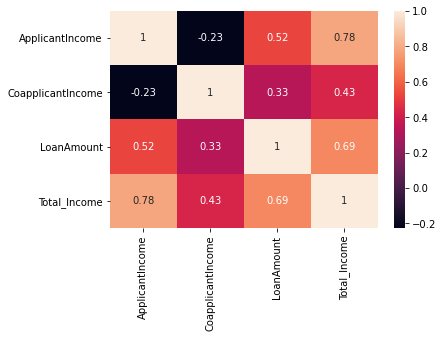

In [32]:
nume_df = data_df[nume_cols_by_status]
corelation = nume_df.corr()
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True);

Ta thấy 2 cột `ApplicationIncome` và `Total_Income` khá tương quan nhau, nên ta sẽ loại bỏ cột `Total_Income`

In [33]:
try:
    data_df = data_df.drop(columns=['Total_Income'])
except:
    pass

### Thu nhập người đăng ký vay và quyết định phê duyệt cho vay của ngân hàng

Loan_Status
No     3750.0
Yes    3727.0
Name: ApplicantIncome, dtype: float64

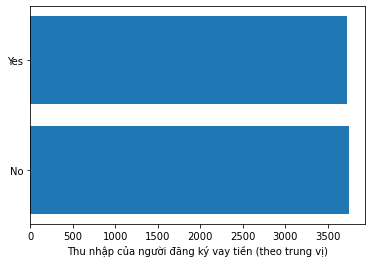

In [34]:
applicationIncome_status = data_df.groupby('Loan_Status')['ApplicantIncome'].median().round(1)
plt.barh(applicationIncome_status.index, applicationIncome_status.values)
plt.xlabel('Thu nhập của người đăng ký vay tiền (theo trung vị)');
applicationIncome_status

Ta thấy, quyết định phê duyệt và không phê duyện khoản vay của ngân hàng dựa trên thu nhập người đăng khá tương đồng nhau.

### Thu nhập người đồng đăng ký vay tiền và quyết định phê duyệt cho vay của ngân hàng

Loan_Status
No        0.0
Yes    1300.0
Name: CoapplicantIncome, dtype: float64

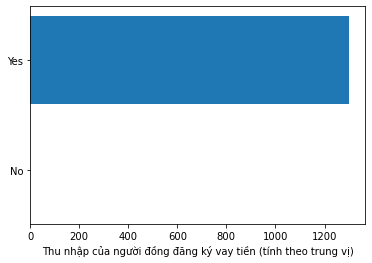

In [35]:
coapplicantIncome_status = data_df.groupby('Loan_Status')['CoapplicantIncome'].median().round(1)
plt.barh(coapplicantIncome_status.index, coapplicantIncome_status.values)
plt.xlabel('Thu nhập của người đồng đăng ký vay tiền (tính theo trung vị)')
coapplicantIncome_status

Ta thấy ngân hàng sẽ từ chối khoản vay đối khi mức thu nhập của người đồng đăng ký (theo trung vị) là 0 và thu nhập khoảng từ 1300 sẽ được chấp nhận khoản vay. Như vậy ảnh hưởng từ thu nhập của người đồng đăng ký vay khá lớn vào việc được chấp nhận cho vay hay không. 

### Số tiền vay và quyết định phê duyệt cho vay của ngân hàng

Loan_Status
No     127.0
Yes    125.0
Name: LoanAmount, dtype: float64

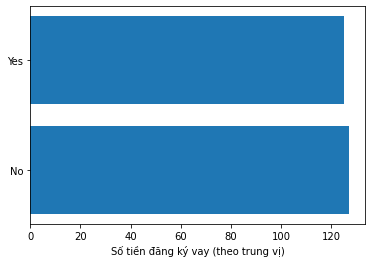

In [36]:
amountLoan_status = data_df.groupby('Loan_Status')['LoanAmount'].median().round(1)
plt.barh(amountLoan_status.index, amountLoan_status.values)
plt.xlabel('Số tiền đăng ký vay (theo trung vị)')
amountLoan_status

Ta nhận thấy quyết định cho vay và không cho vay của ngân hàng khá tương đồng nhau.

### Giới tính và quyết định phê duyệt cho vay của ngân hàng

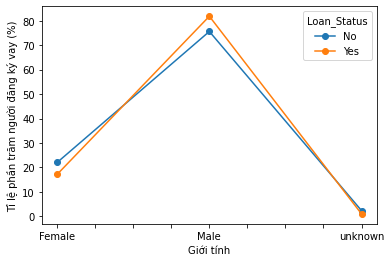

In [71]:
gender_status = data_df.groupby(['Loan_Status','Gender'])['Gender'].count()
gender_status_df = gender_status.unstack(0)
gender_status_ratio = gender_status_df[:] / gender_status_df[:].sum() * 100
gender_status_ratio.plot.line(marker='o')
plt.xlabel('Giới tính')
plt.ylabel('Tỉ lệ phần trăm người đăng ký vay (%)');

Ta thấy, đồng ý khoản vay và từ chối khoản vay khá tương đồng nhau đối với `unkown`. Đối với nam (`Male`) thì tỉ lệ được phê duyệt nhiều hơn số lượng bị từ chối. Đối với nữ (`Female`) thì tỉ lệ bị từ chối cao hơn tỉ lệ được chấp nhận cho vay.

### TÌnh trạng hôn nhân và quyết định phê duyệt cho vay của ngân hàng

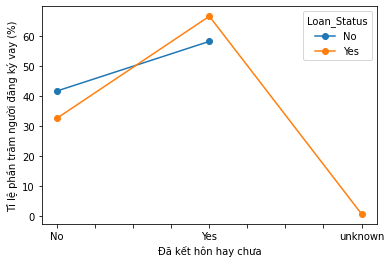

In [79]:
married_status = data_df.groupby(['Loan_Status','Married'])['Married'].count()
married_status_df = married_status.unstack(0)
married_status_ratio = married_status_df[:] / married_status_df[:].sum()*100
married_status_ratio.plot.line(marker='o')
plt.xlabel('Đã kết hôn hay chưa')
plt.ylabel('Tỉ lệ phần trăm người đăng ký vay (%)');

Ta có thể thấy, tỉ lệ người đăng ký đã kết hôn được duyệt khoản vay cao hơn so với bị từ chối. Đồng thời, tỉ lệ người đã kết hôn và được duyệt cao hơn rất nhiều so với những người chưa kết hôn và không được duyệt.

Hmm... phải chăng những người đã kết hôn sẽ dễ được duyệt hơn :)))

### Số lượng người phụ thuộc và quyết định phê duyệt cho vay của ngân hàng

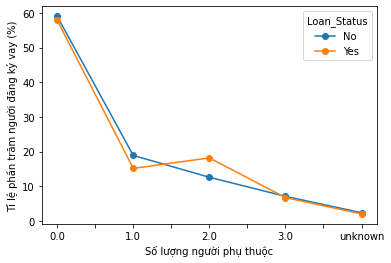

In [85]:
dependents_status = data_df.groupby(['Loan_Status','Dependents'])['Dependents'].count()
dependents_status_df = dependents_status.unstack(0)
dependents_status_ratio = dependents_status_df[:] / dependents_status_df[:].sum()*100
dependents_status_ratio.plot.line(marker='o')
plt.xlabel('Số lượng người phụ thuộc')
plt.ylabel('Tỉ lệ phần trăm người đăng ký vay (%)');

Ta thấy hai đường thẳng khá trùng nhau, tuy nhiên người đăng ký vay tiền có 2 người phụ thuộc sẽ có tỉ lệ được chấp nhận cho vay cao hơn (nhưng cũng không nói lên được điều gì).


### Học thức và quyết định phê duyệt cho vay của ngân hàng

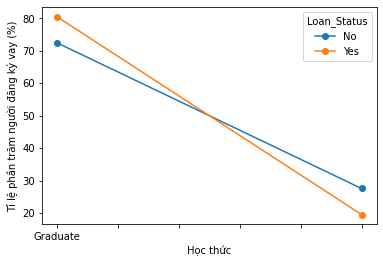

In [84]:
education_status = data_df.groupby(['Loan_Status','Education'])['Education'].count()
education_status_df = education_status.unstack(0)
education_status_ratio = education_status_df[:]/education_status_df[:].sum()*100
education_status_ratio.plot.line(marker='o')
plt.xlabel('Học thức')
plt.ylabel('Tỉ lệ phần trăm người đăng ký vay (%)');

Ta thấy tỉ lệ những người đã tốt nghiệp thường sẽ được chấp thụân cho vay nhiều hơn những người chưa tốt nghiệp và ngược lại.

Hmmm.. có thể là những người đã tốt nghiệp sẽ dễ có công việc ổn định để trả nợ hơn những người chưa tốt nghiệp, nhưng đây chỉ là dự đoán.

### Làm việc tự do và quyết định phê duyệt cho vay của ngân hàng

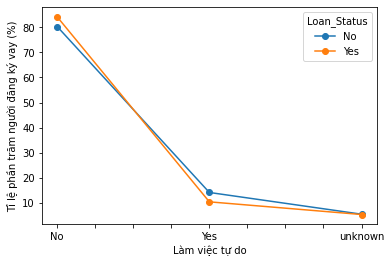

In [88]:
sellfEmployed_status = data_df.groupby(['Loan_Status','Self_Employed'])['Self_Employed'].count()
sellfEmployed_status_df = sellfEmployed_status.unstack(0)
sellfEmployed_status_ratio = sellfEmployed_status_df[:]/sellfEmployed_status_df[:].sum()*100
sellfEmployed_status_ratio.plot.line(marker='o')
plt.xlabel('Làm việc tự do')
plt.ylabel('Tỉ lệ phần trăm người đăng ký vay (%)');

Tỉ lệ người không làm việc tự do (nghĩa là họ công cho công ty hoặc một người khác) sẽ được chấp thuận cho vay nhiều hơn những người đang làm việc tự do và ngược lại. Tuy nhiên chênh lệch không quá lớn.

### Thời hạn cho vay tiền và quyết định phê duyệt cho vay của ngân hàng

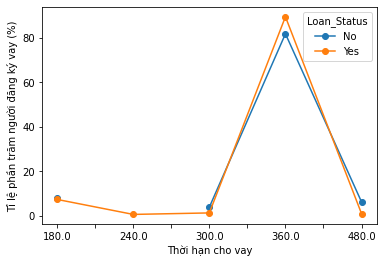

In [93]:
term_status = data_df.groupby(['Loan_Status','Loan_Amount_Term'])['Loan_Amount_Term'].count()
term_status_df = term_status.unstack(0)
term_status_ratio = term_status_df[:]/term_status_df[:].sum()*100
term_status_ratio.plot.line(marker='o')
plt.xlabel('Thời hạn cho vay')
plt.ylabel('Tỉ lệ phần trăm người đăng ký vay (%)');

Ta thấy yếu tố này không có sự khác biệt nhiều đối với sự đồng ý hoặc từ chối cho vay của ngân hàng. Thuộc tính này không ảnh hưởng đến quyết định phê duyệt của ngân hàng.

### Lịch sử tín dụng và quyết định phê duyệt cho vay của ngân hàng

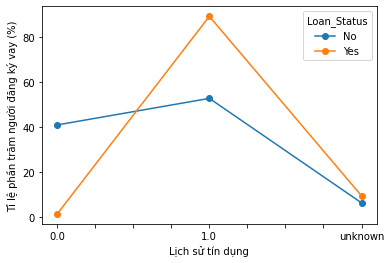

In [94]:
credit_status = data_df.groupby(['Loan_Status','Credit_History'])['Credit_History'].count()
credit_status_df = credit_status.unstack(0)
credit_status_ratio = credit_status_df[:]/credit_status_df[:].sum()*100
credit_status_ratio.plot.line(marker='o')
plt.xlabel('Lịch sử tín dụng')
plt.ylabel('Tỉ lệ phần trăm người đăng ký vay (%)');

Ta thấy tỉ lệ người có lịch sử tín dụng sẽ được chấp nhận cho vay nhiều hơn. Đặc biệt, những người không có lịch sử tín dụng sẽ không được chấp nhận cho vay. 

Điều này khá hợp lý vì khi có được lịch sử tín dụng của người vay thì ngân hàng sẽ biết được uy tín, trách nhiệm và khả năng trả nợ của người đăng ký vay. Từ đó họ sẽ quyết định xem có chấp nhận cho người đó vay hay không.

### Nơi sống và quyết định phê duyệt cho vay của ngân hàng

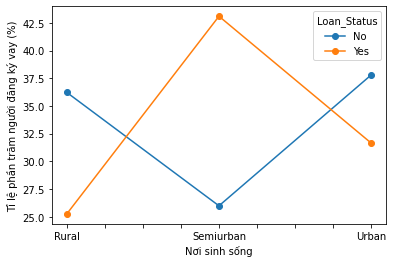

In [101]:
area_status = data_df.groupby(['Loan_Status','Property_Area'])['Property_Area'].count()
area_status_df = area_status.unstack(0)
area_status_ratio = area_status_df[:]/area_status_df[:].sum()*100
area_status_ratio.plot.line(marker='o')
plt.xlabel('Nơi sinh sống')
plt.ylabel('Tỉ lệ phần trăm người đăng ký vay (%)');

Ta thấy tỉ lệ những người đăng ký sống ở đô thị vệ tinh được chấp nhận cho vay rất lớn và tỉ lệ người sinh sống ở đó bị từ chối khá thấp. Còn ở đô thị và nông thôn, tỉ lệ người bị từ chối khá cao và cao hơn so với tỉ lệ người được đồng ý cho vay.
hmm... phải chăng ngân hàng ưu tiên cho những người ở vùng đô thị vệ tinh vay tiền hơn.. :))

## Kết luận

Sau khi phân tích dữ liệu, ta có thể rút ra kết luận như sau:
- Tỉ lệ người được chấp nhận cho vay cao hơn người bị từ chối.
- Tình trạng hôn nhân cũng có ảnh hưởng khá nhiều đến quyết định cho vay của ngân hàng.
- Người đã tốt nghiệp và không làm việc tự do sẽ có tỉ lệ được chấp thuận cho vay cao. 
- Lịch sử tín dụng có ảnh hưởng khá lớn đến việc được chấp nhận cho vay.
- Người sống ở vùng đô thị vệ tinh (lân cận vùng đô thị) sẽ có tỉ lệ được chấp thuận cao hơn.